<a href="https://colab.research.google.com/github/thuyzy/GraduationThesis/blob/main/%5BGT%5D_Data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasist
!pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.7/11.7 MB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 69.1/69.1 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 385.8/385.8 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.5/133.5 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 23.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.4/66.4 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: jupyter-client
    Found existing installation: jupyter-client 6.1.12
    Uninstalling jupyter-client-6.1.12:
      Successfully uninstalled jupyter-client-6.1.12
  Attempting uninstall: jupyter-server
    Found existing installation: jupyter-server 1.24.0
    Uninstalling jupyter-server-1.24.0:
      Successfully uninstalled jupyter-server-1.24.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.9 MB/s eta 0:00:

In [2]:
# Packages for EDA
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
# Data Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from datasist.structdata import detect_outliers
from sklearn.metrics import mean_squared_error
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
import category_encoders as ce
import re
# Modeling and evaluation
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import (
BaggingClassifier,
ExtraTreesClassifier,
RandomForestClassifier,
StackingClassifier,
HistGradientBoostingClassifier
)
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import joblib
# Packages options
sns.set(rc={'figure.figsize': [14, 7]}, font_scale=1.2) # Standard figure size for all
np.seterr(divide='ignore', invalid='ignore', over='ignore') ;
import warnings
warnings.filterwarnings("ignore")

/usr/local/lib/python3.11/dist-packages/sklearn/experimental/enable_hist_gradient_boosting.py:19: UserWarning: Since version 1.0, it is not needed to import enable_hist_gradient_boosting anymore. HistGradientBoostingClassifier and HistGradientBoostingRegressor are now stable and can be normally imported from sklearn.ensemble.
  warnings.warn(


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [71]:
# Đọc df từ file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data-credit-score.csv').head(40000)

In [72]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,0x10059,CUS_0x3d6c,April,Jaisinghanij,30,815-82-2603,Media_Manager,43894.24_,3690.853333,4,...,Standard,1422.84,26.605364,32 Years and 4 Months,Yes,142.963448,143.33458561666652,High_spent_Medium_value_payments,332.78729990130574,Standard
39996,0x1005a,CUS_0x3d6c,May,Jaisinghanij,30,815-82-2603,Media_Manager,43894.24,3690.853333,4,...,Standard,1422.84,36.953666,32 Years and 5 Months,Yes,142.963448,191.107258621961,Low_spent_Large_value_payments,305.0146268960113,Standard
39997,0x1005b,CUS_0x3d6c,June,Jaisinghanij,30,815-82-2603,Media_Manager,43894.24,3690.853333,4,...,Standard,1422.84,30.530881,32 Years and 6 Months,Yes,142.963448,147.59180764116368,Low_spent_Small_value_payments,368.5300778768086,Standard
39998,0x1005c,CUS_0x3d6c,July,Jaisinghanij,30,815-82-2603,Media_Manager,43894.24,NaN,4,...,_,1422.84,40.548704,32 Years and 7 Months,Yes,142.963448,328.15522012137,!@9#%8,187.96666539660228,Standard


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        40000 non-null  object 
 1   Customer_ID               40000 non-null  object 
 2   Month                     40000 non-null  object 
 3   Name                      36032 non-null  object 
 4   Age                       40000 non-null  object 
 5   SSN                       40000 non-null  object 
 6   Occupation                40000 non-null  object 
 7   Annual_Income             40000 non-null  object 
 8   Monthly_Inhand_Salary     34016 non-null  float64
 9   Num_Bank_Accounts         40000 non-null  int64  
 10  Num_Credit_Card           40000 non-null  int64  
 11  Interest_Rate             40000 non-null  int64  
 12  Num_of_Loan               40000 non-null  object 
 13  Type_of_Loan              35464 non-null  object 
 14  Delay_

In [74]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,34016.0,4214.653870,3207.566512,332.128333,1643.408750,3091.000000,5964.883333,15136.696667
Num_Bank_Accounts,40000.0,16.858100,116.706194,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,40000.0,23.376400,132.690816,0.000000,4.000000,6.000000,7.000000,1499.000000
Interest_Rate,40000.0,69.814075,455.074797,1.000000,7.000000,13.000000,20.000000,5788.000000
Delay_from_due_date,40000.0,21.086625,14.791553,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,39229.0,26.279079,184.257571,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,40000.0,32.312679,5.129669,20.000000,28.066263,32.328849,36.535533,50.000000
Total_EMI_per_month,40000.0,1386.376721,8280.247312,0.000000,30.621589,68.887019,161.487532,82256.000000


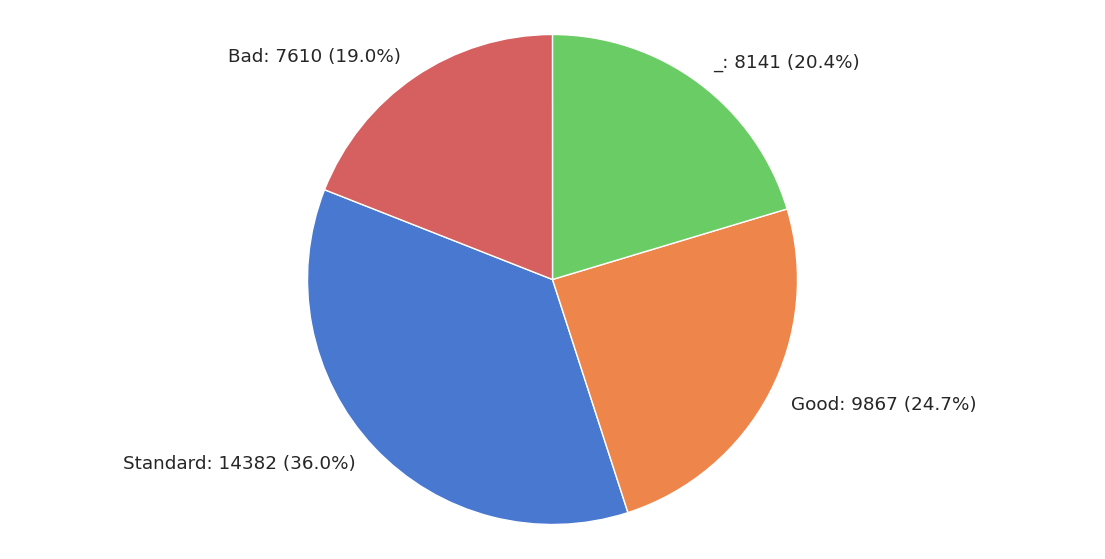

In [75]:
df['Credit_Score'].value_counts()

# Tính số lượng và phần trăm của từng loại trong 'Credit_Mix'
counts = df['Credit_Mix'].value_counts()
percentages = counts / counts.sum() * 100

# Chuẩn bị dữ liệu cho biểu đồ pie
labels = [f'{label}: {count} ({percent:.1f}%)' for label, count, percent in zip(counts.index, counts, percentages)]

# Vẽ biểu đồ pie
plt.clf()  # Xóa hình vẽ trước đó (nếu có)
plt.pie(counts, labels=labels, autopct='', colors=sns.color_palette("muted"), startangle=158.5)
plt.axis('equal')  # Đảm bảo tỉ lệ trục x và y bằng nhau để vẽ hình tròn
# plt.legend(title='Credit SCore', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))  # Thêm chú thích ở bên ngoài biểu đồ
plt.show()

([0, 1, 2, 3],
 [Text(0, 0, '_'),
  Text(1, 0, 'Good'),
  Text(2, 0, 'Standard'),
  Text(3, 0, 'Bad')])

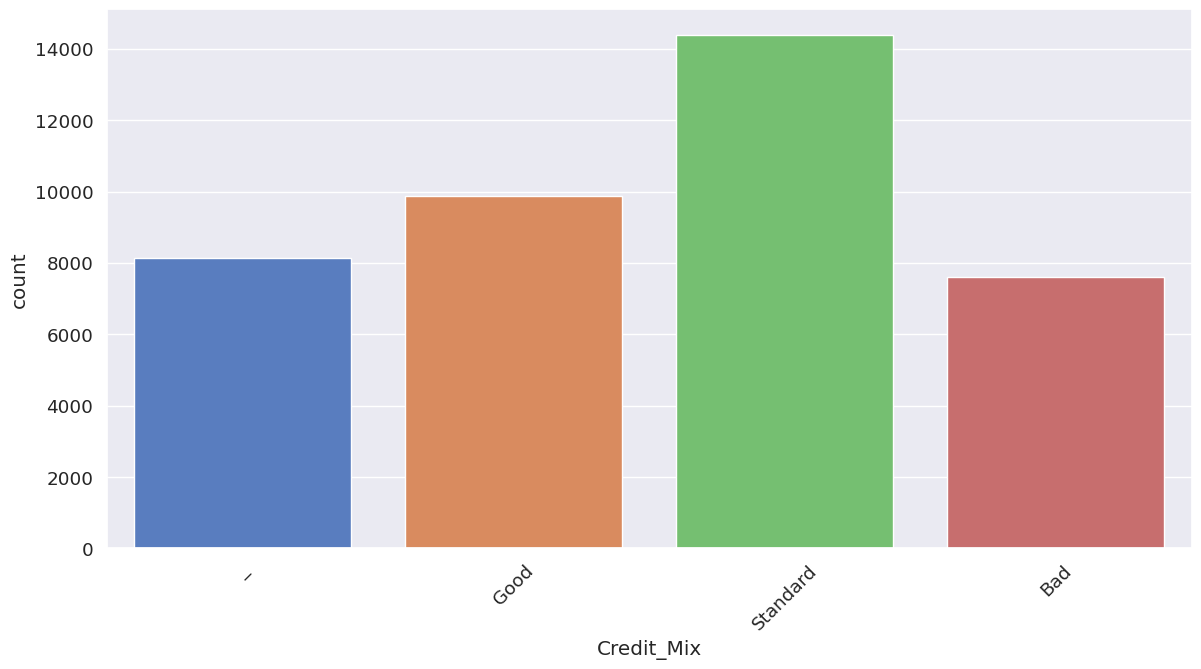

In [76]:
sns.countplot(x = df['Credit_Mix'],palette = "muted");
plt.xticks(rotation = 45)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
 [Text(0, 0, 'Scientist'),
  Text(1, 0, '_______'),
  Text(2, 0, 'Teacher'),
  Text(3, 0, 'Engineer'),
  Text(4, 0, 'Entrepreneur'),
  Text(5, 0, 'Developer'),
  Text(6, 0, 'Lawyer'),
  Text(7, 0, 'Media_Manager'),
  Text(8, 0, 'Doctor'),
  Text(9, 0, 'Journalist'),
  Text(10, 0, 'Manager'),
  Text(11, 0, 'Accountant'),
  Text(12, 0, 'Musician'),
  Text(13, 0, 'Mechanic'),
  Text(14, 0, 'Writer'),
  Text(15, 0, 'Architect')])

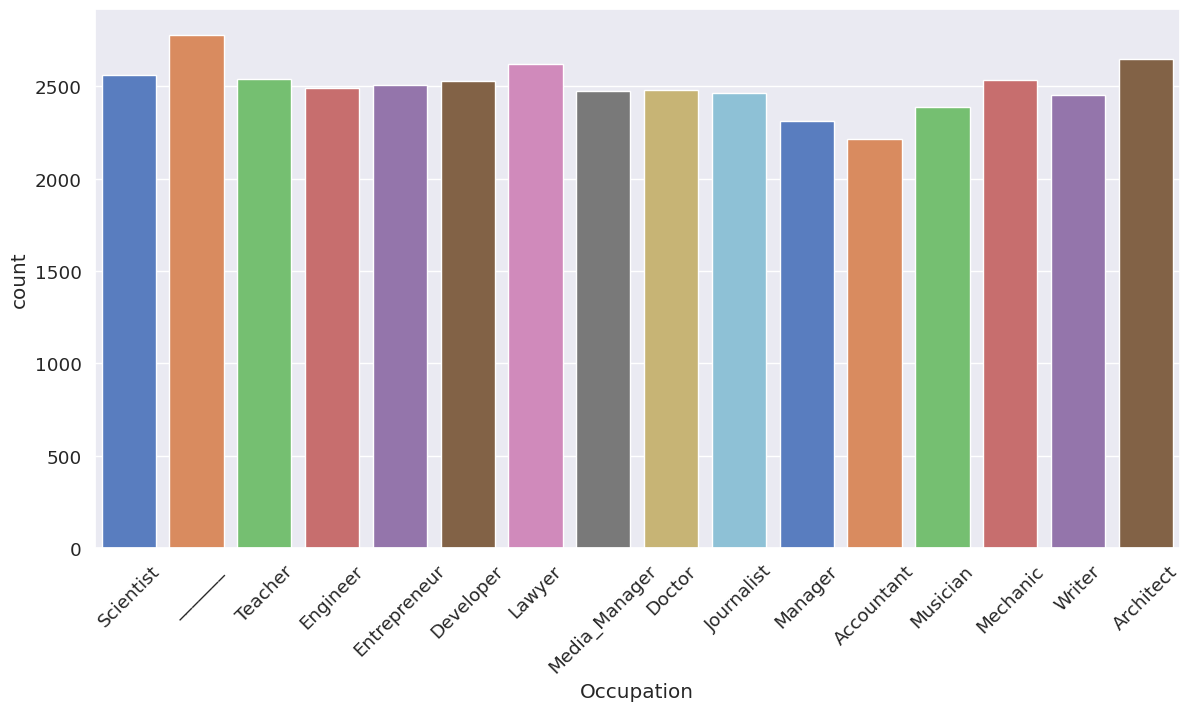

In [77]:
sns.countplot(x = df['Occupation'],palette = "muted");
plt.xticks(rotation = 45)

([0, 1, 2], [Text(0, 0, 'No'), Text(1, 0, 'NM'), Text(2, 0, 'Yes')])

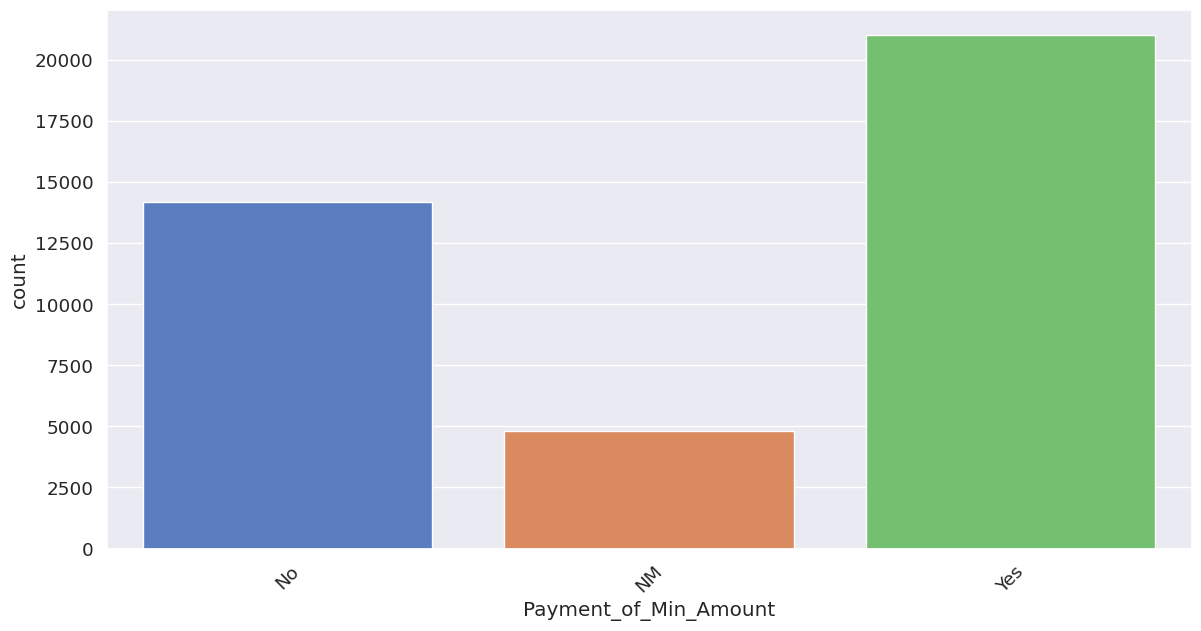

In [78]:
sns.countplot(x = df['Payment_of_Min_Amount'],palette = "muted");
plt.xticks(rotation = 45)

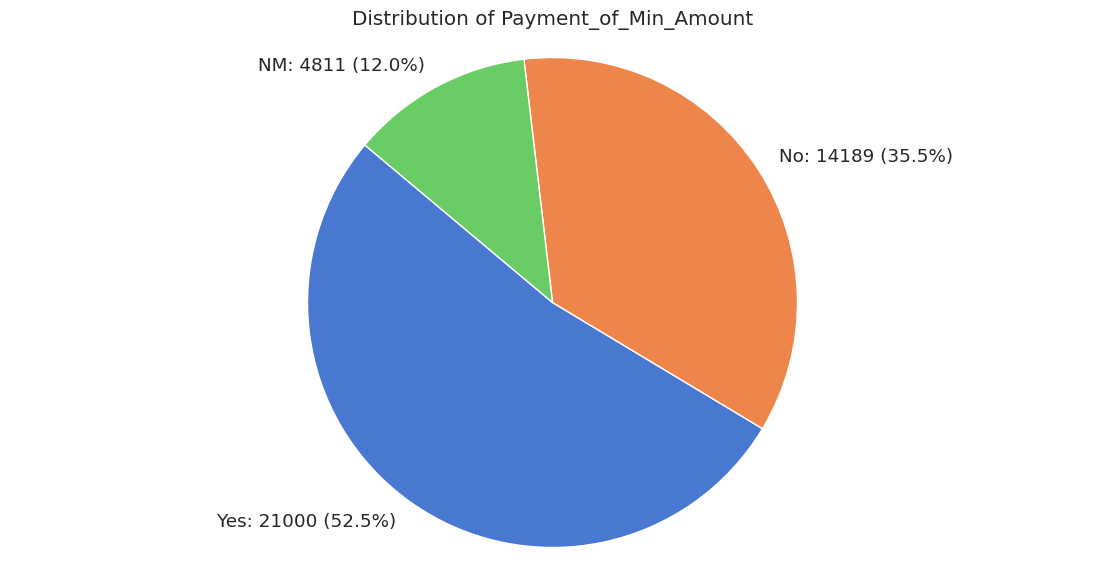

In [79]:
# prompt: tạo biểu đồ tròn phân bổ có trọng số Payment_of_Min_Amount, có phần trăm

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'df' is your DataFrame and it's already loaded
# ... (your existing code to load the dataframe)

# Calculate the value counts and percentages for 'Payment_of_Min_Amount'
payment_counts = df['Payment_of_Min_Amount'].value_counts()
payment_percentages = payment_counts / payment_counts.sum() * 100

# Create labels with counts and percentages
payment_labels = [f'{label}: {count} ({percent:.1f}%)' for label, count, percent in zip(payment_counts.index, payment_counts, payment_percentages)]

# Create the pie chart
plt.clf()
plt.pie(payment_counts, labels=payment_labels, autopct='', colors=sns.color_palette("muted"), startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Payment_of_Min_Amount') # Add a title
plt.show()


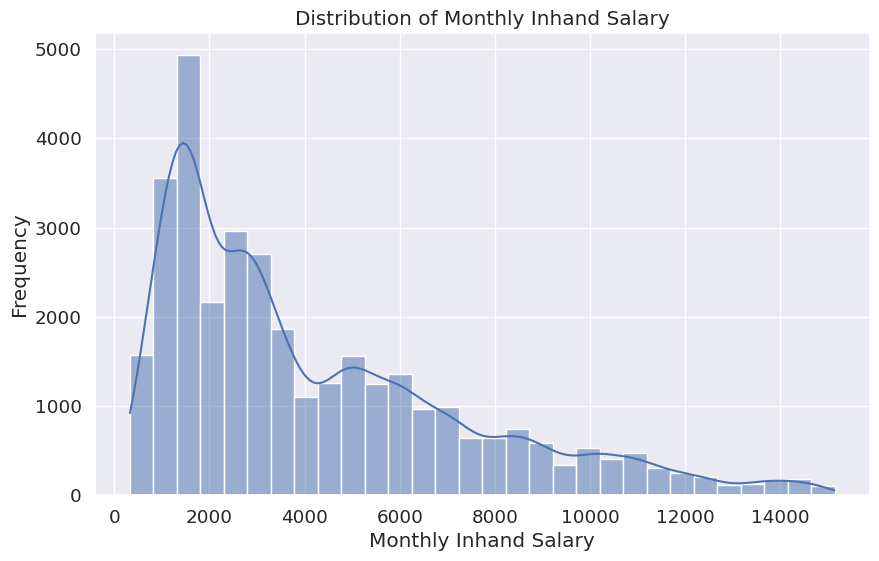

In [80]:
# Biểu đồ distplot "Monthly_Inhand_Salary"
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['Monthly_Inhand_Salary'], kde=True, bins=30, edgecolor='white')
plt.title('Distribution of Monthly Inhand Salary')
plt.xlabel('Monthly Inhand Salary')
plt.ylabel('Frequency')
plt.show()

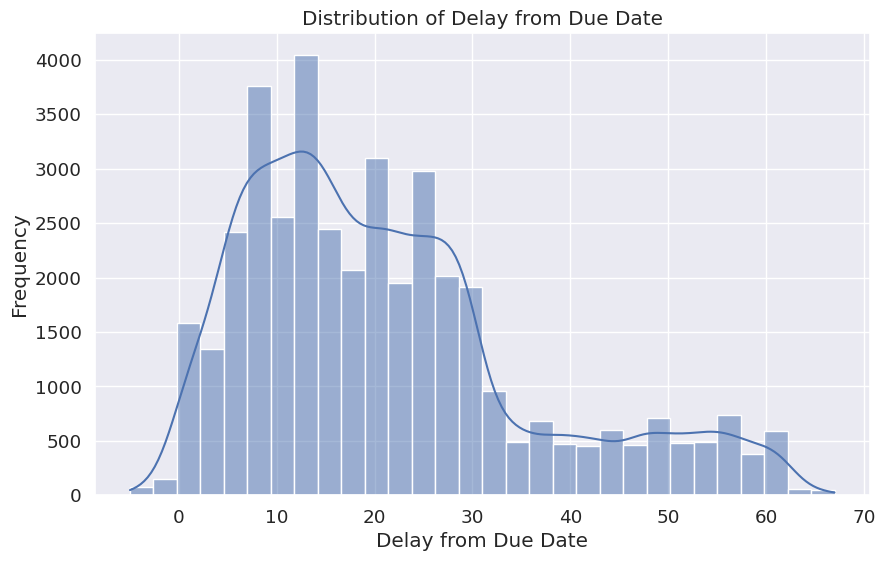

In [81]:
# prompt: vẽ biểu đồ distplot của giá trị 'Delay_from_due_date', viền các cột

plt.figure(figsize=(10, 6))
sns.histplot(df['Delay_from_due_date'], kde=True, bins=30, edgecolor='white') # Added edgecolor
plt.title('Distribution of Delay from Due Date')
plt.xlabel('Delay from Due Date')
plt.ylabel('Frequency')
plt.show()


In [82]:
df['Type_of_Loan'].value_counts().head(10)

,count
Type_of_Loan,
Credit-Builder Loan,520
Not Specified,520
Payday Loan,488
Debt Consolidation Loan,480
Personal Loan,456
Mortgage Loan,448
Student Loan,424
Home Equity Loan,408
Auto Loan,376


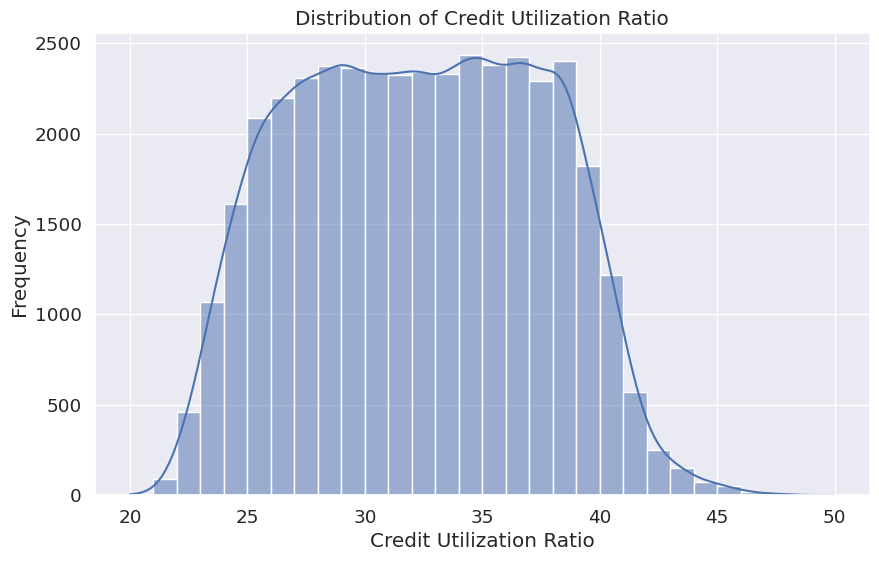

In [83]:
# prompt: vẽ biểu đồ distplot cho cột Credit_Utilization_Ratio

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(df['Credit_Utilization_Ratio'], kde=True, bins=30, edgecolor='white')
plt.title('Distribution of Credit Utilization Ratio')
plt.xlabel('Credit Utilization Ratio')
plt.ylabel('Frequency')
plt.show()


In [84]:
df['Credit_History_Age'].describe()

,Credit_History_Age
count,36320
unique,404
top,19 Years and 4 Months
freq,187


Issue Identified

1.   ID, Name, SSN, Month, Customerid, Age, Monthly inhand salary are not used.
2.   2.Num_of_Loan, Num_of_Delayed_Payment, Changed_Credit_Limit, Amount_invested_monthly, Outstanding_Debt Credit_Mix, Monthly_Balance Numerical but show as catogery (need to be fixed)
3. Occupation, CreditMix has value "__"
4. Num_Credit_Card has zeros
5. Type_of_Loan Need to rewrite as 8 columns
6. Num_Bank_Accounts contains negative values
7. Credit_History_Age,Payment_of_Min_Amount,Payment_Behaviour,'Credit_Mix' (needs Feature Engineering)
8. Target Columns is Imbalanced
9. A lot of missing data





**DATA PREPROCESSING**

**Data Cleaning**

Removing Irrelevant Columns

In [85]:
del df['ID']
del df['Name']
del df['SSN']
del df['Occupation']

del df['Month']
del df['Customer_ID']
del df['Age']
del df['Monthly_Inhand_Salary']

Fixing Numerical column

In [86]:
to_fix = ['Annual_Income','Num_of_Loan', 'Num_of_Delayed_Payment',
          'Changed_Credit_Limit', 'Amount_invested_monthly',
          'Outstanding_Debt', 'Monthly_Balance']

In [87]:
def fix_nums(num):
  try:
    return float(num.replace("_"," "))
  except:
    return np.nan

In [88]:
for col in to_fix:
  df[col] = df[col].apply(fix_nums)

**Perform Feature Engineering**

Convert 'years and months' to months

In [89]:
# prompt: Cột df['Credit_History_Age'] đang là object, tách lấy số years và số months và tính bằng công thức số years*12+số months cho từng dòng
import re
import numpy as np

def convert_credit_history_age(age_str):
    # Convert input to string to handle potential NaN or float values
    age_str = str(age_str)
    try:
        years, months = map(int, re.findall(r'\d+', age_str))
        return years * 12 + months
    except ValueError:
        return np.nan  # Handle cases where the pattern is not found

df['Credit_History_Age'] = df['Credit_History_Age'].apply(convert_credit_history_age)


Divide type of loans into different columns

In [90]:
for i in df['Type_of_Loan'].value_counts().head(9).index[1:] :
  df[i] = df['Type_of_Loan'].str.contains(i)
del df['Type_of_Loan']

Get absolute values for bank accounts

In [91]:
df['Num_Bank_Accounts'] = df['Num_Bank_Accounts'].apply(lambda x :abs (x))

Put Credit Card owned to atleast one

In [92]:
df['Num_Credit_Card'].replace(0,1,inplace=True)

In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Annual_Income             40000 non-null  float64
 1   Num_Bank_Accounts         40000 non-null  int64  
 2   Num_Credit_Card           40000 non-null  int64  
 3   Interest_Rate             40000 non-null  int64  
 4   Num_of_Loan               40000 non-null  float64
 5   Delay_from_due_date       40000 non-null  int64  
 6   Num_of_Delayed_Payment    37183 non-null  float64
 7   Changed_Credit_Limit      39182 non-null  float64
 8   Num_Credit_Inquiries      39229 non-null  float64
 9   Credit_Mix                40000 non-null  object 
 10  Outstanding_Debt          40000 non-null  float64
 11  Credit_Utilization_Ratio  40000 non-null  float64
 12  Credit_History_Age        36320 non-null  float64
 13  Payment_of_Min_Amount     40000 non-null  object 
 14  Total_

In [94]:
df['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,21000
No,14189
NM,4811


In [95]:
df['Payment_of_Min_Amount'].replace("NM","No",inplace = True)

In [96]:
df['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,21000
No,19000


In [97]:
df['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,10267
High_spent_Medium_value_payments,7047
Low_spent_Medium_value_payments,5544
High_spent_Large_value_payments,5427
High_spent_Small_value_payments,4613
Low_spent_Large_value_payments,4108
!@9#%8,2994


In [98]:
df['Payment_Behaviour'].replace('!@9#%8',np.nan,inplace = True)
df['Payment_Behaviour'].value_counts()

,count
Payment_Behaviour,
Low_spent_Small_value_payments,10267
High_spent_Medium_value_payments,7047
Low_spent_Medium_value_payments,5544
High_spent_Large_value_payments,5427
High_spent_Small_value_payments,4613
Low_spent_Large_value_payments,4108


In [99]:
df['Credit_Mix'].value_counts()

,count
Credit_Mix,
Standard,14382
Good,9867
_,8141
Bad,7610


In [100]:
m = {
"Bad": 0,
"Good": 2,
"Standard":1,
"_":np.nan
}

In [101]:
df['Credit_Mix'] = df['Credit_Mix'].map(m)

In [102]:
df['Credit_Mix'].value_counts()

,count
Credit_Mix,
1.0,14382
2.0,9867
0.0,7610


Handling missing data

In [103]:
for col in list(df.columns[-8:]):
  df[col] = df[col].astype(float)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Annual_Income             40000 non-null  float64
 1   Num_Bank_Accounts         40000 non-null  int64  
 2   Num_Credit_Card           40000 non-null  int64  
 3   Interest_Rate             40000 non-null  int64  
 4   Num_of_Loan               40000 non-null  float64
 5   Delay_from_due_date       40000 non-null  int64  
 6   Num_of_Delayed_Payment    37183 non-null  float64
 7   Changed_Credit_Limit      39182 non-null  float64
 8   Num_Credit_Inquiries      39229 non-null  float64
 9   Credit_Mix                31859 non-null  float64
 10  Outstanding_Debt          40000 non-null  float64
 11  Credit_Utilization_Ratio  40000 non-null  float64
 12  Credit_History_Age        36320 non-null  float64
 13  Payment_of_Min_Amount     40000 non-null  object 
 14  Total_

In [105]:
Numericals= df.select_dtypes(exclude = 'object').columns[1:]
Numericals

Index(['Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Monthly_Balance', 'Not Specified',
       'Payday Loan', 'Debt Consolidation Loan', 'Personal Loan',
       'Mortgage Loan', 'Student Loan', 'Home Equity Loan', 'Auto Loan'],
      dtype='object')

In [106]:
imputer = SimpleImputer(strategy = "median")

In [107]:
for col in Numericals[1:]:
  df[[col]] = imputer.fit_transform(df[[col]])
# df['Payment_Behaviour'] = imputer.fit_transform(df['Payment_Behaviour'])

**Handling Categorical Data**

In [108]:
df.select_dtypes(include="object")

,Payment_of_Min_Amount,Payment_Behaviour,Credit_Score
0,No,High_spent_Small_value_payments,Good
1,No,Low_spent_Large_value_payments,Good
2,No,Low_spent_Medium_value_payments,Good
3,No,Low_spent_Small_value_payments,Good
4,No,High_spent_Medium_value_payments,Good
...,...,...,...
39995,Yes,High_spent_Medium_value_payments,Standard
39996,Yes,Low_spent_Large_value_payments,Standard
39997,Yes,Low_spent_Small_value_payments,Standard
39998,Yes,NaN,Standard


In [109]:
df['Credit_Score'].value_counts()

,count
Credit_Score,
Standard,21116
Poor,11743
Good,7141


In [110]:
m = {
"Poor":0,
"Standard":1,
"Good":2
}

In [111]:
df['Credit_Score'] = df['Credit_Score'].map(m)

In [112]:
df['Payment_of_Min_Amount'].value_counts()

,count
Payment_of_Min_Amount,
Yes,21000
No,19000


In [113]:
m = {
"Yes": 1,
"No":0
}

In [114]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map(m)

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Annual_Income             40000 non-null  float64
 1   Num_Bank_Accounts         40000 non-null  int64  
 2   Num_Credit_Card           40000 non-null  float64
 3   Interest_Rate             40000 non-null  float64
 4   Num_of_Loan               40000 non-null  float64
 5   Delay_from_due_date       40000 non-null  float64
 6   Num_of_Delayed_Payment    40000 non-null  float64
 7   Changed_Credit_Limit      40000 non-null  float64
 8   Num_Credit_Inquiries      40000 non-null  float64
 9   Credit_Mix                40000 non-null  float64
 10  Outstanding_Debt          40000 non-null  float64
 11  Credit_Utilization_Ratio  40000 non-null  float64
 12  Credit_History_Age        40000 non-null  float64
 13  Payment_of_Min_Amount     40000 non-null  int64  
 14  Total_

In [116]:
encoded = pd.get_dummies(df['Payment_Behaviour'],drop_first=True)
encoded

,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,False,True,False,False,False
1,False,False,True,False,False
2,False,False,False,True,False
3,False,False,False,False,True
4,True,False,False,False,False
...,...,...,...,...,...
39995,True,False,False,False,False
39996,False,False,True,False,False
39997,False,False,False,False,True
39998,False,False,False,False,False


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Annual_Income             40000 non-null  float64
 1   Num_Bank_Accounts         40000 non-null  int64  
 2   Num_Credit_Card           40000 non-null  float64
 3   Interest_Rate             40000 non-null  float64
 4   Num_of_Loan               40000 non-null  float64
 5   Delay_from_due_date       40000 non-null  float64
 6   Num_of_Delayed_Payment    40000 non-null  float64
 7   Changed_Credit_Limit      40000 non-null  float64
 8   Num_Credit_Inquiries      40000 non-null  float64
 9   Credit_Mix                40000 non-null  float64
 10  Outstanding_Debt          40000 non-null  float64
 11  Credit_Utilization_Ratio  40000 non-null  float64
 12  Credit_History_Age        40000 non-null  float64
 13  Payment_of_Min_Amount     40000 non-null  int64  
 14  Total_

In [118]:
encoded = pd.get_dummies(df['Payment_Behaviour'],drop_first=True)
df = pd.concat([df, encoded], axis=1)
df

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,...,Personal Loan,Mortgage Loan,Student Loan,Home Equity Loan,Auto Loan,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments
0,19114.12,3,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1.0,...,1.0,0.0,0.0,1.0,1.0,False,True,False,False,False
1,19114.12,3,4.0,3.0,4.0,-1.0,14.0,11.27,4.0,2.0,...,1.0,0.0,0.0,1.0,1.0,False,False,True,False,False
2,19114.12,3,4.0,3.0,4.0,3.0,7.0,9.33,4.0,2.0,...,1.0,0.0,0.0,1.0,1.0,False,False,False,True,False
3,19114.12,3,4.0,3.0,4.0,5.0,4.0,6.27,4.0,2.0,...,1.0,0.0,0.0,1.0,1.0,False,False,False,False,True
4,19114.12,3,4.0,3.0,4.0,6.0,14.0,11.27,4.0,2.0,...,1.0,0.0,0.0,1.0,1.0,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,43894.24,4,7.0,16.0,4.0,11.0,14.0,12.69,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,True,False,False,False,False
39996,43894.24,4,7.0,16.0,4.0,6.0,14.0,12.69,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,False,False,True,False,False
39997,43894.24,4,7.0,16.0,4.0,6.0,14.0,12.69,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,False,False,False,False,True
39998,43894.24,4,7.0,16.0,4.0,6.0,12.0,12.69,3.0,1.0,...,0.0,0.0,0.0,0.0,1.0,False,False,False,False,False


In [119]:
order = [col for col in df.columns if col != 'Credit_Score'] + ['Credit_Score']
df = df[order]
del df['Payment_Behaviour']

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Annual_Income                     40000 non-null  float64
 1   Num_Bank_Accounts                 40000 non-null  int64  
 2   Num_Credit_Card                   40000 non-null  float64
 3   Interest_Rate                     40000 non-null  float64
 4   Num_of_Loan                       40000 non-null  float64
 5   Delay_from_due_date               40000 non-null  float64
 6   Num_of_Delayed_Payment            40000 non-null  float64
 7   Changed_Credit_Limit              40000 non-null  float64
 8   Num_Credit_Inquiries              40000 non-null  float64
 9   Credit_Mix                        40000 non-null  float64
 10  Outstanding_Debt                  40000 non-null  float64
 11  Credit_Utilization_Ratio          40000 non-null  float64
 12  Cred

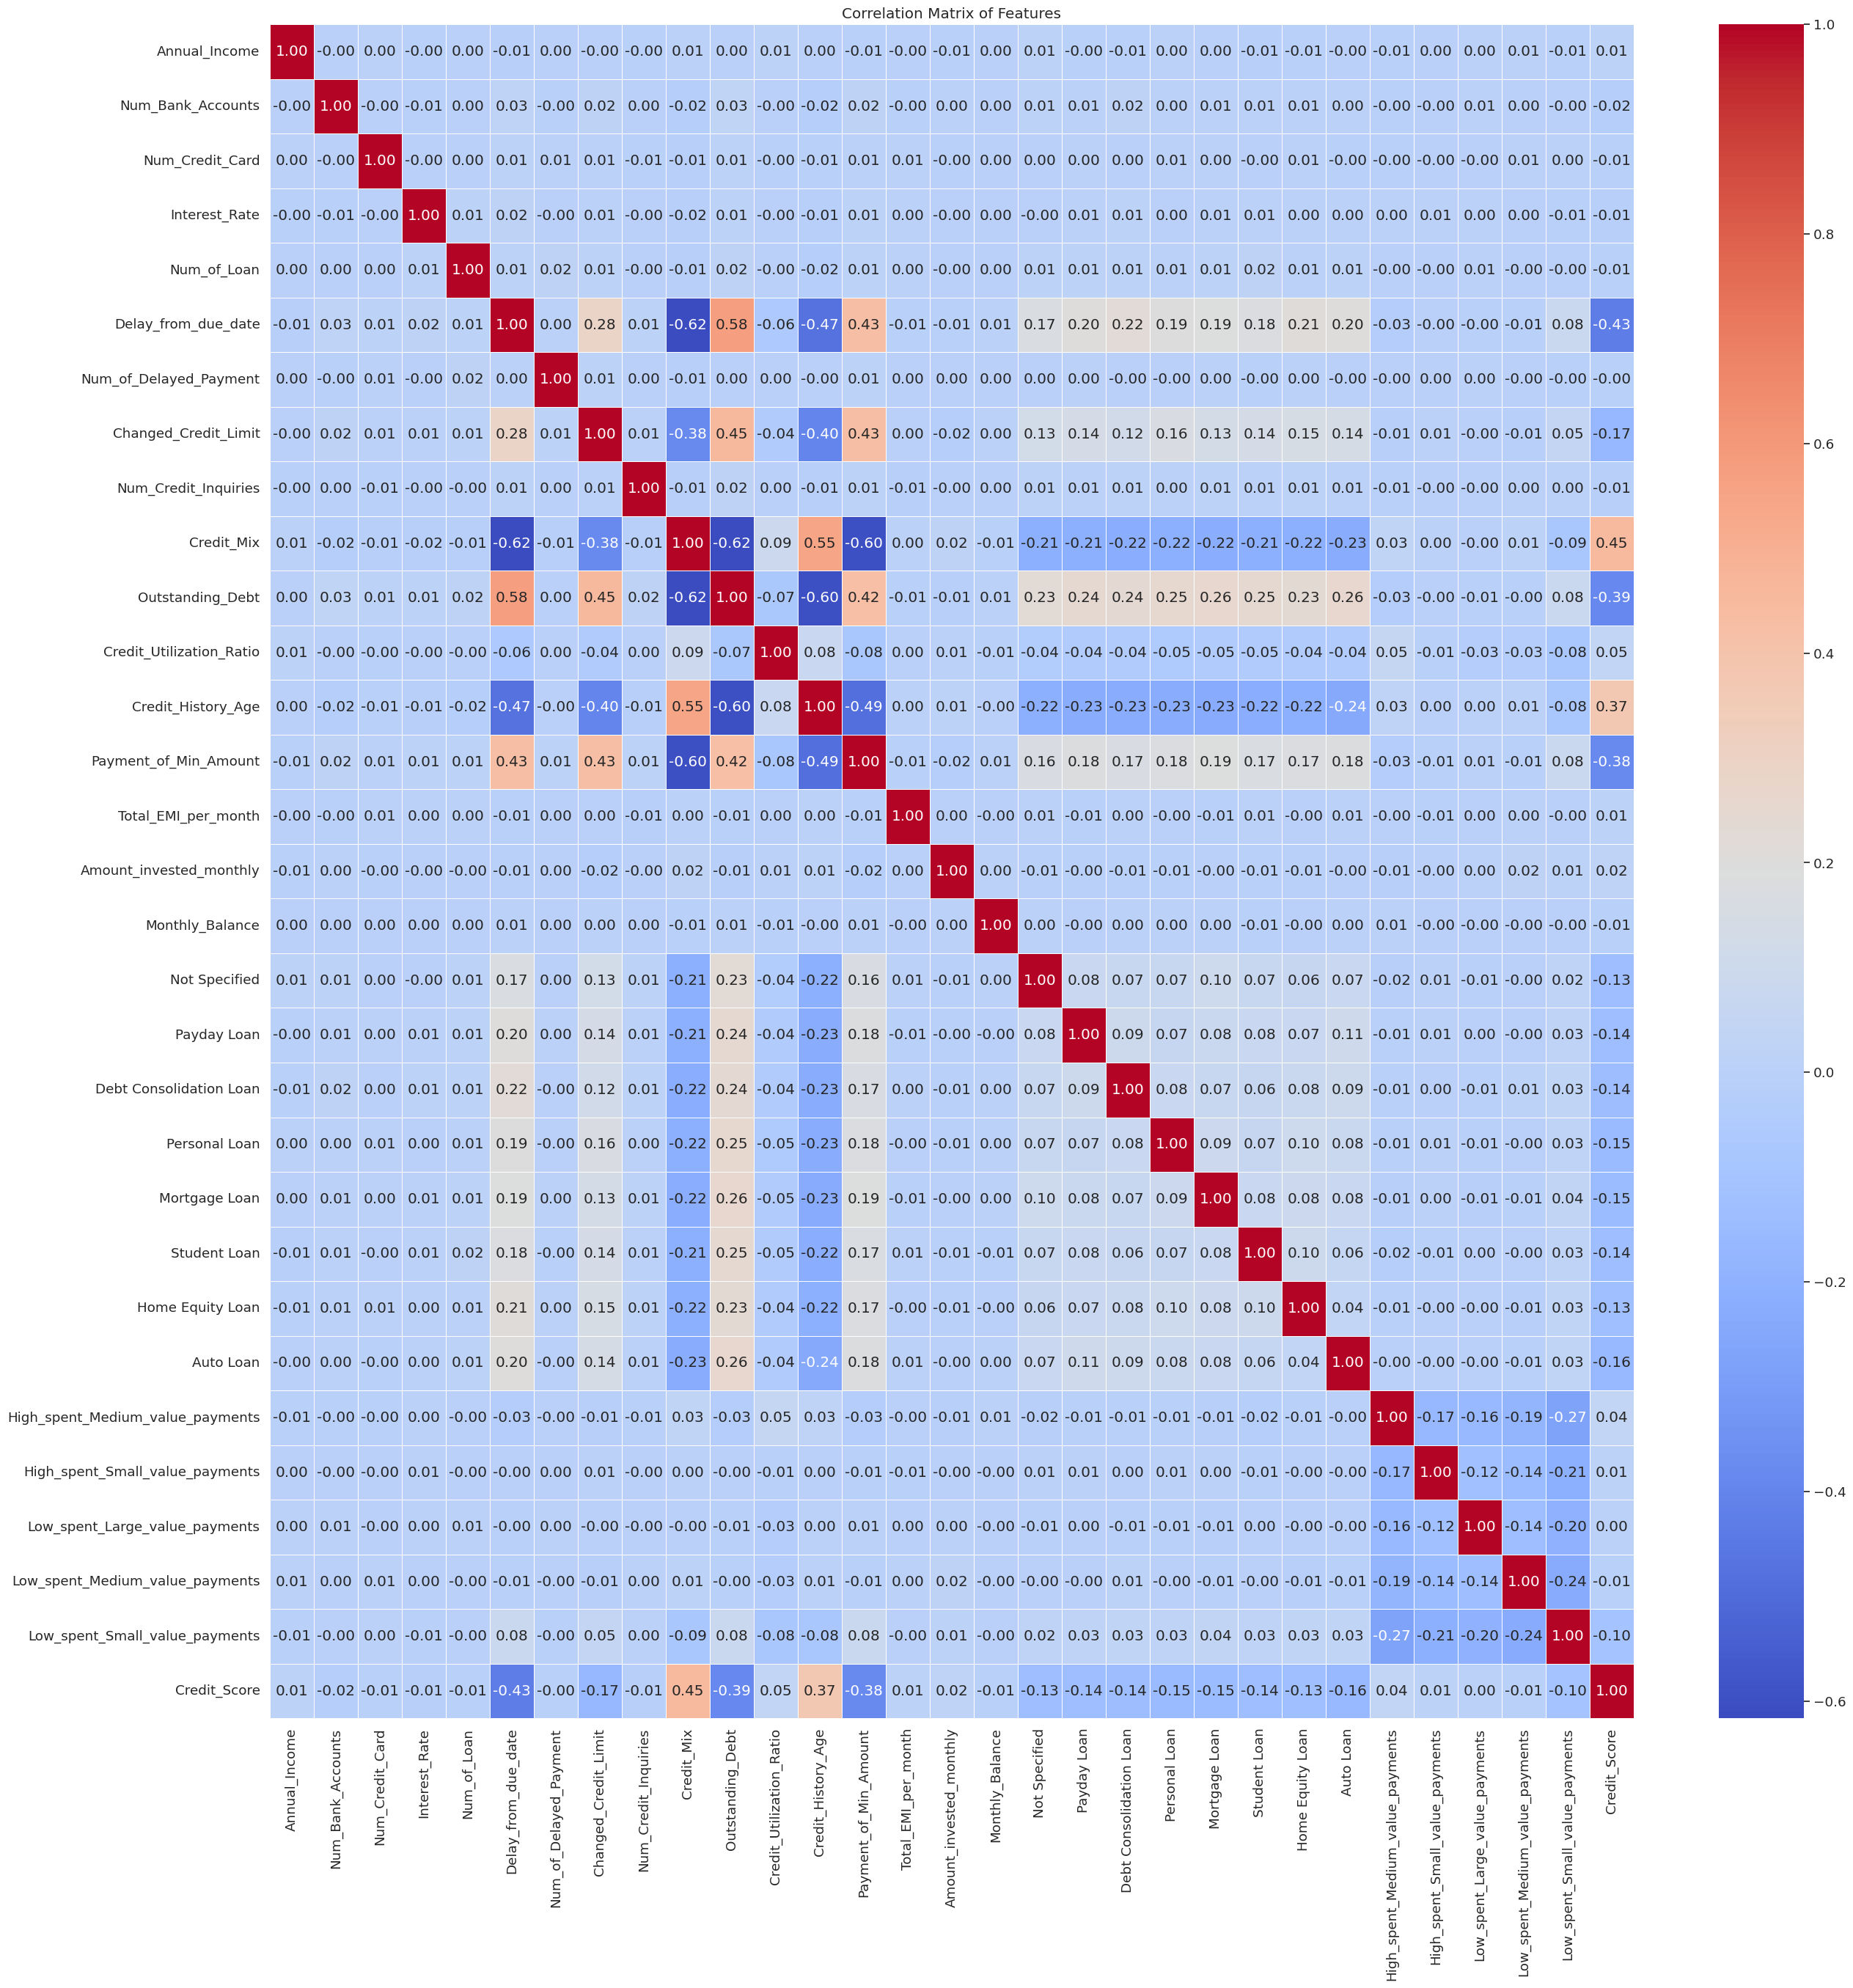

In [121]:
# prompt: vẽ một heatmap tương quan giữa các biến, hiển thị kích thước phù hợp

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and it's already loaded
# ... (your existing code to load the dataframe)


# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(30, 30))  # Adjust the figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Features')
plt.show()


In [122]:
from sklearn.preprocessing import StandardScaler
# Tạo X và y từ DataFrame df
X = df.drop("Credit_Score",axis=1).values
y = df["Credit_Score"].values
# Khởi tạo scaler
scaler = StandardScaler()
# Scale các features trong X
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.10991228, -0.11874758, -0.14603102, ..., -0.33831121,
        -0.40112449, -0.58762791],
       [-0.10991228, -0.11874758, -0.14603102, ...,  2.95585831,
        -0.40112449, -0.58762791],
       [-0.10991228, -0.11874758, -0.14603102, ..., -0.33831121,
         2.49299162, -0.58762791],
       ...,
       [-0.09216559, -0.11017895, -0.12342178, ..., -0.33831121,
        -0.40112449,  1.70175715],
       [-0.09216559, -0.11017895, -0.12342178, ..., -0.33831121,
        -0.40112449, -0.58762791],
       [-0.09216559, -0.11017895, -0.12342178, ..., -0.33831121,
        -0.40112449, -0.58762791]])

In [123]:
y

array([2, 2, 2, ..., 1, 1, 1])

In [124]:
from imblearn.over_sampling import RandomOverSampler
# Khởi tạo RandomOverSampler
oversampler = RandomOverSampler()
# Cân bằng lớp cho X_scaled và y
X_resampled, y_resampled = oversampler.fit_resample(X_scaled, y)
# Hiển thị kích thước của X_resampled và y_resampled sau khi cân bằng lớp
print("Kích thước của X_resampled:", X_resampled.shape)
print("Kích thước của y_resampled:", y_resampled.shape)

Kích thước của X_resampled: (63348, 30)
Kích thước của y_resampled: (63348,)


In [125]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/data_cleaned_40.csv',index=False)
df

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,...,Mortgage Loan,Student Loan,Home Equity Loan,Auto Loan,High_spent_Medium_value_payments,High_spent_Small_value_payments,Low_spent_Large_value_payments,Low_spent_Medium_value_payments,Low_spent_Small_value_payments,Credit_Score
0,19114.12,3,4.0,3.0,4.0,3.0,7.0,11.27,4.0,1.0,...,0.0,0.0,1.0,1.0,False,True,False,False,False,2
1,19114.12,3,4.0,3.0,4.0,-1.0,14.0,11.27,4.0,2.0,...,0.0,0.0,1.0,1.0,False,False,True,False,False,2
2,19114.12,3,4.0,3.0,4.0,3.0,7.0,9.33,4.0,2.0,...,0.0,0.0,1.0,1.0,False,False,False,True,False,2
3,19114.12,3,4.0,3.0,4.0,5.0,4.0,6.27,4.0,2.0,...,0.0,0.0,1.0,1.0,False,False,False,False,True,2
4,19114.12,3,4.0,3.0,4.0,6.0,14.0,11.27,4.0,2.0,...,0.0,0.0,1.0,1.0,True,False,False,False,False,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,43894.24,4,7.0,16.0,4.0,11.0,14.0,12.69,3.0,1.0,...,0.0,0.0,0.0,1.0,True,False,False,False,False,1
39996,43894.24,4,7.0,16.0,4.0,6.0,14.0,12.69,3.0,1.0,...,0.0,0.0,0.0,1.0,False,False,True,False,False,1
39997,43894.24,4,7.0,16.0,4.0,6.0,14.0,12.69,3.0,1.0,...,0.0,0.0,0.0,1.0,False,False,False,False,True,1
39998,43894.24,4,7.0,16.0,4.0,6.0,12.0,12.69,3.0,1.0,...,0.0,0.0,0.0,1.0,False,False,False,False,False,1
